<a href="https://colab.research.google.com/github/lekshmiiyyer/Customer_Churn_Prediction/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

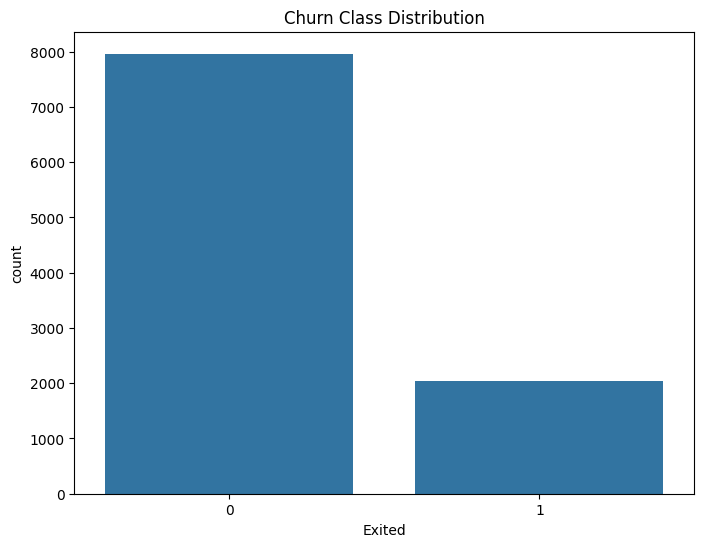

Evaluating Models...

Logistic Regression Model
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.50      0.14      0.22       393

    accuracy                           0.80      2000
   macro avg       0.66      0.55      0.55      2000
weighted avg       0.76      0.80      0.76      2000

Confusion Matrix:
 [[1552   55]
 [ 338   55]]
Accuracy: 0.8035


Random Forest Model
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.45      0.54       393

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

Confusion Matrix:
 [[1527   80]
 [ 216  177]]
Accuracy: 0.852


Gradient Boosting Model
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1    

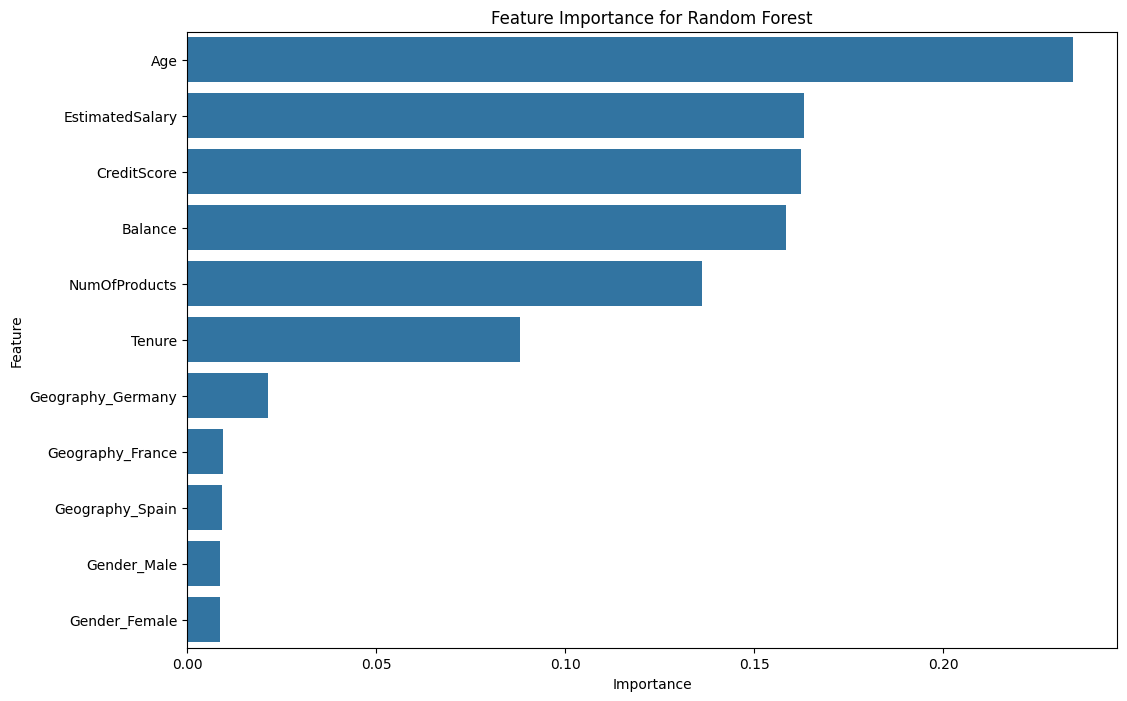

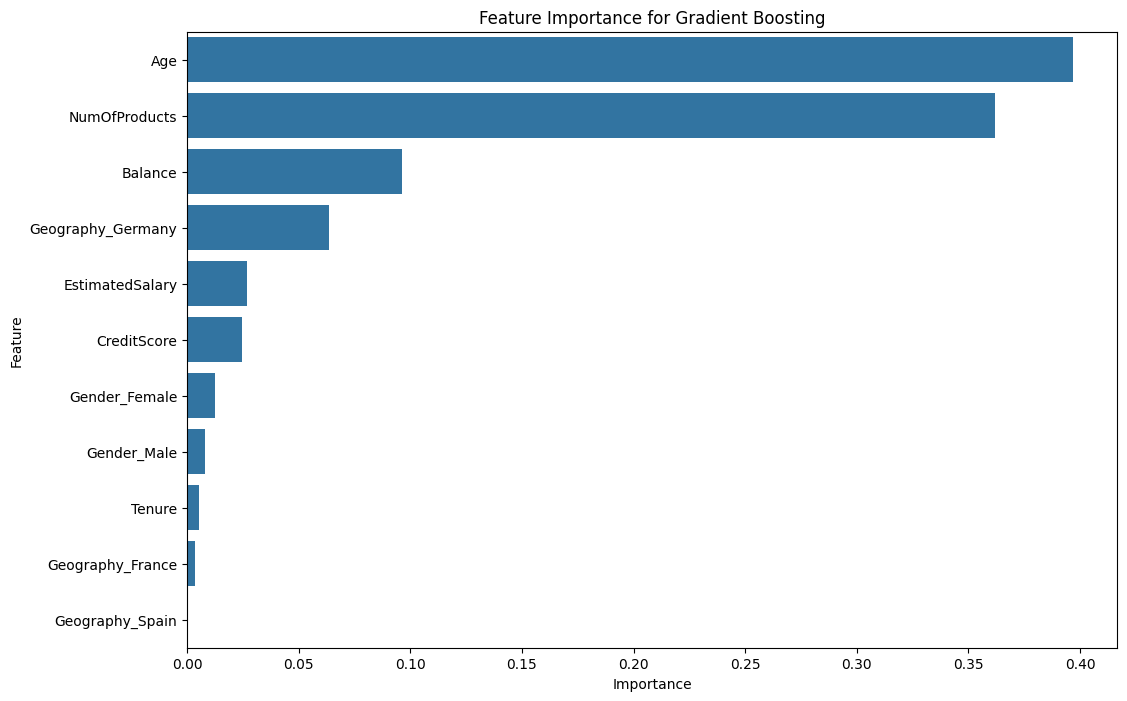

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=data)
plt.title('Churn Class Distribution')
plt.show()

# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Separate features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']

# Separate numeric and categorical features
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

# Preprocessing pipeline for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = preprocessor.transform(X_test)

# Build and train the models
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_preprocessed, y_train)
y_pred_logreg = logreg_model.predict(X_test_preprocessed)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_preprocessed, y_train)
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_preprocessed, y_train)
y_pred_gb = gb_model.predict(X_test_preprocessed)

# Evaluate the models
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Model")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    return accuracy

print("Evaluating Models...\n")
acc_logreg = evaluate_model("Logistic Regression", y_test, y_pred_logreg)
print("\n")
acc_rf = evaluate_model("Random Forest", y_test, y_pred_rf)
print("\n")
acc_gb = evaluate_model("Gradient Boosting", y_test, y_pred_gb)
print("\n")

# Determine the best model
accuracies = {"Logistic Regression": acc_logreg, "Random Forest": acc_rf, "Gradient Boosting": acc_gb}
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy: {best_accuracy}")

# Visualize the feature importance for Random Forest and Gradient Boosting
def plot_feature_importance(model, model_name):
    feature_importance = model.feature_importances_
    feature_names = numeric_features + preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features).tolist()
    feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_df = feature_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_df)
    plt.title(f'Feature Importance for {model_name}')
    plt.show()

plot_feature_importance(rf_model, "Random Forest")
plot_feature_importance(gb_model, "Gradient Boosting")
